# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Read data

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\MSC DATA SCIENCE\SEM-I\SET I\DJIA news data and code\Combined_News_DJIA.csv')

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## Check for null values

In [4]:
df.shape

(1989, 27)

In [5]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

We have null values for columns - 'Top23', 'Top24', and 'Top25'

We will remove the rows that contain null values

In [6]:
df.dropna(inplace= True)

check for null values again

In [7]:
df.shape

(1986, 27)

In [8]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

# Visualize the distribution of target variable

In [9]:
df.value_counts(df.Label)

Label
1    1062
0     924
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

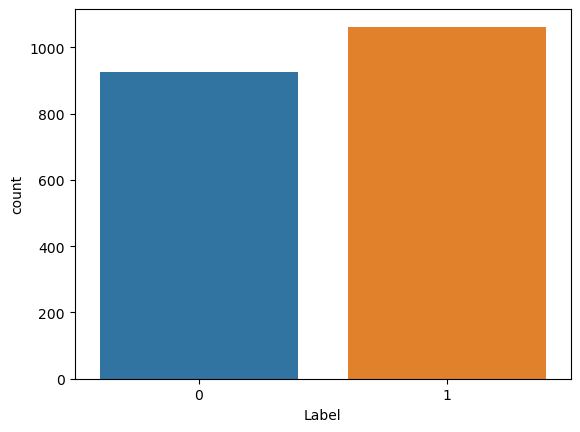

In [10]:
sns.countplot(x=df['Label'])

The dataset is balanced in terms of number of tagets

# Split the dataset into training and test data

In [11]:
df_train = df[df['Date'] < '20150101']
df_test = df[df['Date'] > '20141231']

## Here we will define the functions for performing Data Cleaning and Preprocessing

In [12]:
# function for cleaning the data
def clean_data(dataset):
    data = dataset.iloc[:,2:27]
    data.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
    return data

# function for combining the headlines of all the columns into single column
def combine_data(data):
    headlines = []
    for i in range(len(data.index)):
        headlines.append(' '.join(str(x) for x in data.iloc[i, :]))
    return headlines

# function to perform lemmatization of the word
def lemmatize_data(data, lemmatizer):
    cleaned_dataset = []
    for i in range(len(data)):
        clean_text = data[i].lower()
        clean_text = clean_text.split()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in stopwords.words('english')]
        cleaned_dataset.append(' '.join(clean_text))
    return cleaned_dataset

# function to vectorize the data
def vectorize_data(data, cv):
    vectorized_dataset = cv.fit_transform(data)
    return vectorized_dataset

# Clean train and test data

In [13]:
# clean train and test data
clean_train_data = clean_data(df_train)
clean_test_data = clean_data(df_test)

# Combine headlines

In [14]:
# combine the headlines in single column
comb_train_data = combine_data(clean_train_data)
comb_test_data = combine_data(clean_test_data)

# Create Lemmatizer object

In [15]:
lemmatizer = WordNetLemmatizer()

## Lemmatize the data

In [16]:
# lemmatize data
train_data = lemmatize_data(comb_train_data, lemmatizer)
test_data = lemmatize_data(comb_test_data, lemmatizer)

# Create CountVectorizer object

In [28]:
cv = TfidfVectorizer(ngram_range=(2,2))

# Vectorize the data

In [29]:
len(train_data)

1860

In [54]:
# vectorize data
cv = TfidfVectorizer(ngram_range=(2,2))
vec_train_data = vectorize_data(train_data, cv)
vec_test_data = cv.transform(test_data)

In [55]:
import pickle

# Save the TfidfVectorizer to a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(cv, vectorizer_file)

In [56]:
print(vec_train_data)

  (0, 187996)	0.06405017290096815
  (0, 217164)	0.06405017290096815
  (0, 157700)	0.060735850362792804
  (0, 241826)	0.06405017290096815
  (0, 31225)	0.060735850362792804
  (0, 166608)	0.06405017290096815
  (0, 216049)	0.05175565602242611
  (0, 336673)	0.06405017290096815
  (0, 374234)	0.06405017290096815
  (0, 386485)	0.06405017290096815
  (0, 201988)	0.06405017290096815
  (0, 312329)	0.06405017290096815
  (0, 210065)	0.06405017290096815
  (0, 315987)	0.06405017290096815
  (0, 170208)	0.060735850362792804
  (0, 245520)	0.06405017290096815
  (0, 82723)	0.06405017290096815
  (0, 55478)	0.06405017290096815
  (0, 288809)	0.06405017290096815
  (0, 387759)	0.05506997856060144
  (0, 14855)	0.06405017290096815
  (0, 233673)	0.060735850362792804
  (0, 165522)	0.06405017290096815
  (0, 28799)	0.060735850362792804
  (0, 176375)	0.06405017290096815
  :	:
  (1859, 233580)	0.12303575679494932
  (1859, 163925)	0.040635222236260045
  (1859, 361476)	0.043254634272751245
  (1859, 189320)	0.048345090158

# Create Random Forest Classifier

In [35]:
# create classifier
rf_clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_clf.fit(vec_train_data, df_train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

# Predictions

In [36]:
# run precictions on test data
y_pred = rf_clf.predict(vec_test_data)

# Check Accuracy

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score, recall_score

In [38]:
confusion_matrix(df_test['Label'], y_pred)

array([[135,  51],
       [ 11, 181]], dtype=int64)

In [39]:
print(classification_report(df_test['Label'], y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       186
           1       0.78      0.94      0.85       192

    accuracy                           0.84       378
   macro avg       0.85      0.83      0.83       378
weighted avg       0.85      0.84      0.83       378



In [40]:
print('accuracy_score :',accuracy_score(df_test['Label'], y_pred).round(2))
print('precision_score :',precision_score(df_test['Label'], y_pred).round(2))
print('recall_score :',recall_score(df_test['Label'], y_pred).round(2))

accuracy_score : 0.84
precision_score : 0.78
recall_score : 0.94


## Using Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()
lr_clf.fit(vec_train_data, df_train['Label'])

# run precictions on test data
y_pred = lr_clf.predict(vec_test_data)

print(confusion_matrix(df_test['Label'], y_pred))
print(classification_report(df_test['Label'], y_pred))

[[130  56]
 [  0 192]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378



In [42]:
import pickle

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr_clf, model_file)


In [43]:
# import pickle

# # Load the model from a file
# with open('logistic_regression_model.pkl', 'rb') as model_file:
#     lr_clf_loaded = pickle.load(model_file)

# ****************************************************************

In [44]:
dataset="Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?Bush puts foot down on Georgian conflict Jewish Georgian minister: Thanks to Israeli training, we are fending off Russia Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired Olympic opening ceremony fireworks 'faked'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?Russia angered by Israeli military sale to Georgia An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people Welcome To World War IV! Now In High Definition! Georgia's move, a mistake of monumental proportions Russia presses deeper into Georgia; U.S. says regime change is goal Abhinav Bindra wins first ever Individual Olympic Gold Medal for India  U.S. ship heads for Arctic to define territory Drivers in a Jerusalem taxi station threaten to quit rather than work for their new boss - an Arab The French Team is Stunned by Phelps and the 4x100m Relay Team Israel and the US behind the Georgian aggression? Do not believe TV, neither Russian nor Georgian. There are much more victims Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.China to overtake US as largest manufacturer War in South Ossetia [PICS]'b'Israeli Physicians Group Condemns State Torture'b' Russia has just beaten the United States over the head with Peak Oil Perhaps *the* question about the Georgia - Russia conflict Russia is so much better at war So this is what it's come to: trading sex for food"

In [59]:
import pickle
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the trained logistic regression model
model_path = r'C:\Users\DELL\Desktop\PRTFLIO\Data-Science-Projects\Sentiment_Analysis_for_Dow_Jones_(DJIA_Stock)\logistic_regression_model.pkl'  # Replace with the correct file path
lr_clf_loaded = pickle.load(open(model_path, 'rb'))

# Load the fitted TF-IDF vectorizer
vectorizer_path = r'C:\Users\DELL\Desktop\PRTFLIO\Data-Science-Projects\Sentiment_Analysis_for_Dow_Jones_(DJIA_Stock)\tfidf_vectorizer.pkl'  # Replace with the correct file path
tfidf_vectorizer = pickle.load(open(vectorizer_path, 'rb'))

# # Load the TfidfVectorizer from the pickle file
# with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
#     loaded_cv = pickle.load(vectorizer_file)

# Function for cleaning the data
def clean_data(dataset):
    data = pd.Series(dataset).str.replace("[^a-zA-Z]", " ", regex=True)
    return data

# Function to perform lemmatization of the words
def lemmatize_data(data, lemmatizer):
    cleaned_dataset = []
    for i in range(len(data)):
        clean_text = data[i].lower()
        clean_text = clean_text.split()
        clean_text = [lemmatizer.lemmatize(word) for word in clean_text if word not in stopwords.words('english')]
        cleaned_dataset.append(' '.join(clean_text))
    return cleaned_dataset

In [68]:
# Predictor function
def predictor(newdata):

    # Clean the data
    data1 = clean_data(newdata)
    
    # Perform lemmatization
    data2 = lemmatize_data(data1, WordNetLemmatizer())
    
    # Vectorize the new text data using the loaded TfidfVectorizer
    vectorized_data = tfidf_vectorizer.transform(data2)
    
    # Make a prediction
    predict = lr_clf_loaded.predict(vectorized_data)
    
    # Return the prediction
    if predict == 1:
        return 'Prediction: The Index Value will remain the SAME or will go UP.'
    else:
        return 'Prediction: The Index Value will go DOWN!'

# # Example usage
# dataset = "Your news article text goes here."
#dataset="Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?Bush puts foot down on Georgian conflict Jewish Georgian minister: Thanks to Israeli training, we are fending off Russia Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired Olympic opening ceremony fireworks 'faked'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?Russia angered by Israeli military sale to Georgia An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people Welcome To World War IV! Now In High Definition! Georgia's move, a mistake of monumental proportions Russia presses deeper into Georgia; U.S. says regime change is goal Abhinav Bindra wins first ever Individual Olympic Gold Medal for India  U.S. ship heads for Arctic to define territory Drivers in a Jerusalem taxi station threaten to quit rather than work for their new boss - an Arab The French Team is Stunned by Phelps and the 4x100m Relay Team Israel and the US behind the Georgian aggression? Do not believe TV, neither Russian nor Georgian. There are much more victims Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.China to overtake US as largest manufacturer War in South Ossetia [PICS]'b'Israeli Physicians Group Condemns State Torture'b' Russia has just beaten the United States over the head with Peak Oil Perhaps *the* question about the Georgia - Russia conflict Russia is so much better at war So this is what it's come to: trading sex for food"

dataset="b' U.S. refuses Israel weapons to attack Iran: report' b\"When the president ordered to attack Tskhinvali [the capital of South Ossetia], we knew then we were doomed. How come he didn't realize that?\" b' Israel clears troops who killed Reuters cameraman' b'Britain's policy of being tough on drugs is \"pointless\", says a former civil servant who once ran the Cabinet's anti-drugs unit.' b'Body of 14 year old found in trunk; Latest (ransom paid) kidnapping victim in Mexico. Head cop quits, Prez dissolves suspect elite task force' b'China has moved 10 *million* quake survivors into prefab homes' b\"Bush announces Operation Get All Up In Russia's Grill. Yeah, this will end well.\" b'Russian forces sink Georgian ships ' b\"The commander of a Navy air reconnaissance squadron that provides the President and the defense secretary the airborne ability to command the nation's nuclear weapons has been relieved of duty\" b\"92% of CNN readers: Russia's actions in Georgia - justified!\" b'USA to send fleet into Black Sea to help Georgia, send troops in \"humanitarian aid exercise\"' b\"US warns against Israeli plan to strike against Iran's nuclear facilities\" b\"In an intriguing cyberalliance, two Estonian computer experts are heading to Georgia to keep the country's networks running amid an intense military confrontation with Russia\" b'The CNN Effect: Georgia Schools Russia in Information Warfare' b'Why Russias response to Georgia was right' b'Elephants extinct by 2020?' b'US humanitarian missions soon in Georgia - if Russia hits the US - WWIII?' b\"Georgia's DDOS came from US sources\" b'Russian convoy heads"

prediction = predictor(dataset)

print(prediction)

Prediction: The Index Value will remain the SAME or will go UP.
